# Comprehensive Guide to Classification Algorithms in Machine Learning

## Introduction
This notebook provides a detailed guide to several machine learning classification algorithms. We will cover both the theory behind these algorithms and their practical implementation. We will also compare their performance on the `breast cancer` dataset from scikit-learn, which includes features of the breast mass and labels indicating the presence of breast cancer.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

**Logistic Regression** is a **supervised machine learning algorithm** used for **binary classification tasks**. It predicts the probability that a given input belongs to one of two classes (e.g., Class 0 or Class 1).

---

#### Key Characteristics

1. **Output**:
   - Outputs probabilities between 0 and 1 using the sigmoid function.
   - Converts probabilities into class labels using a threshold (e.g., \( > 0.5 \) predicts Class 1).

2. **Core Idea**:
   - Applies a linear model:
  $$
  z = w^T x + b
  $$
     Where:
     - \( z \): Linear combination of weights (\( w \)), input features (\( x \)), and bias (\( b \)).
   - Maps \( z \) into a probability using the sigmoid function:
  $$
  \hat{y} = \frac{1}{1 + e^{-z}}
  $$

3. **Loss Function**:
   - Minimizes the **log loss (cross-entropy loss)**, which measures the difference between predicted probabilities and actual labels.

4. **Applications**:
   - Spam detection (Spam or Not Spam).
   - Medical diagnosis (Disease or No Disease).
   - Customer churn prediction (Churn or Retain).

---

#### Why Use Logistic Regression?

- **Simple and Efficient**: Easy to implement and computationally inexpensive.
- **Interpretable**: Outputs probabilities, making results interpretable.
- **Effective**: Performs well for linearly separable data.

While logistic regression is primarily used for binary classification, it can be extended to multiclass problems using techniques like **one-vs-rest** or **softmax regression**.


In [3]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f'Logistic Regression accuracy: {log_reg_accuracy:.2f}')

Logistic Regression accuracy: 0.97


## 2. K-Nearest Neighbours

**K-Nearest Neighbors (KNN)** is a **supervised machine learning algorithm** used for **classification** and **regression** tasks. It is a simple, non-parametric method that makes predictions based on the similarity of a data point to its nearest neighbors in the feature space.

---

#### Key Characteristics

1. **How It Works**:
   - The algorithm calculates the **distance** (e.g., Euclidean, Manhattan) between the new data point and all points in the training dataset.
   - It identifies the \( k \) nearest neighbors (data points closest to the new point).
   - For **classification**:
     - Predicts the majority class among the \( k \) neighbors.
   - For **regression**:
     - Predicts the average (or weighted average) of the values of the \( k \) neighbors.

2. **Distance Metrics**:
   - Common metrics include:
     - **Euclidean Distance**:
  $$
  d(x, y) = \sqrt\sum_{i=1}^{n} (x_i - y_i)^2
  $$
     - **Manhattan Distance**:
  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$
     - Other metrics can be used depending on the data and application.

3. **Key Parameter**:
   - The number of neighbors (\( k \)):
     - A small \( k \) may lead to overfitting.
     - A large \( k \) smooths predictions but might ignore local patterns.

4. **Applications**:
   - Handwritten digit recognition (e.g., MNIST dataset).
   - Recommender systems.
   - Medical diagnosis.

---

#### Why Use KNN?

- **Simple and Intuitive**: Easy to understand and implement.
- **Versatile**: Can handle both classification and regression tasks.
- **No Training Phase**: KNN is a **lazy learner**, meaning it doesn't build a model during training and makes predictions at runtime.

---

#### Limitations of KNN

- **Computationally Expensive**:
  - Requires computing the distance to all training points for every prediction.
- **Sensitive to Data Scaling**:
  - Features with large ranges dominate the distance metric. Scaling (e.g., standardization) is essential.
- **Sensitive to Noise**:
  - Outliers and irrelevant features can significantly affect predictions.

---

#### Summary

KNN is a powerful and easy-to-implement algorithm for supervised learning tasks. It relies on the principle of similarity and works well for smaller datasets with clearly separable classes. However, it requires careful choice of \( k \), proper feature scaling, and efficient handling of large datasets to perform optimally.


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'k-NN accuracy: {knn_accuracy:.2f}')

k-NN accuracy: 0.95


## 3. Support Vector Machine

**Support Vector Machine (SVM)** is a **supervised machine learning algorithm** used for **classification** and **regression** tasks. It works by finding the optimal hyperplane that best separates the data into different classes.

---

#### Key Characteristics

1. **Core Idea**:
   - SVM aims to find a **decision boundary** (hyperplane) that maximizes the margin between two classes.
   - The **margin** is the distance between the hyperplane and the closest data points (called **support vectors**).

2. **Mathematical Formulation**:
   - The hyperplane is represented as:
  $$
  w^T x + b = 0
  $$
     Where:
     - \( w \): Weight vector.
     - \( x \): Input features.
     - \( b \): Bias term.
   - For binary classification:
     - Class 1: \( w^T x + b > 0 \)
     - Class 0: \( w^T x + b < 0 \)

3. **Kernel Trick**:
   - SVM can handle non-linear data by using the **kernel trick**, which transforms the data into a higher-dimensional space where a linear hyperplane can separate the classes.
   - Common kernels:
     - **Linear Kernel**: \( K(x, y) = x^T y \)
     - **Polynomial Kernel**: \( K(x, y) = (x^T y + c)^d \)
     - **Radial Basis Function (RBF) Kernel**: \( K(x, y) = \exp(-\gamma ||x - y||^2) \)

4. **Soft Margin**:
   - For datasets that are not perfectly separable, SVM introduces a **slack variable** to allow some misclassifications while still maximizing the margin.

---

#### Applications of SVM

- Text classification (e.g., spam detection).
- Image recognition.
- Bioinformatics (e.g., cancer detection).
- Fraud detection.

---

#### Why Use SVM?

- **Effective for High-Dimensional Data**:
  - Works well for datasets with many features.
- **Robust to Overfitting**:
  - Especially effective in cases with a clear margin of separation.
- **Flexible with Kernels**:
  - Can handle both linear and non-linear data using kernel functions.

---

#### Limitations of SVM

- **Computational Complexity**:
  - Training can be slow for large datasets.
- **Not Ideal for Large Datasets**:
  - Performance decreases with large numbers of samples.
- **Choice of Hyperparameters**:
  - Sensitive to the choice of kernel, \( C \) (regularization), and \( \gamma \) (for RBF kernel).
- **Not Probabilistic**:
  - Unlike logistic regression, SVM does not directly provide probabilities but can be paired with methods like Platt Scaling.

---

#### Summary

SVM is a powerful algorithm for classification and regression, especially when the dataset is small or medium-sized with clearly defined classes. Its ability to handle non-linear data through kernels makes it versatile. However, it requires careful tuning of hyperparameters and may not be the best choice for very large datasets.


In [5]:
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM accuracy: {svm_accuracy:.2f}')

SVM accuracy: 0.96


## 4. Decision Tree

**classification** and **regression** tasks. They work by splitting the dataset into subsets based on feature values, forming a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents an outcome.

---

#### Key Characteristics

1. **How It Works**:
   - The algorithm splits data at each node by selecting the feature that provides the best separation based on a specific metric.
   - The process continues recursively until:
     - All data points in a node belong to the same class (for classification).
     - A stopping criterion (e.g., maximum depth) is reached.

2. **Splitting Criteria**:
   - For **classification**:
     - **Gini Impurity**:
       $$
       G = 1 - \sum_{i=1}^k p_i^2
       $$
     - **Entropy**:
       $$
       H = - \sum_{i=1}^k p_i \log_2(p_i)
       $$
     - These measure how "pure" a node is (i.e., how mixed the classes are).
   - For **regression**:
     - **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)** is used.

3. **Prediction**:
   - For **classification**: Assigns the majority class in a leaf node.
   - For **regression**: Computes the average of target values in a leaf node.

4. **Tree Pruning**:
   - Reduces overfitting by removing branches that provide little to no additional value.
   - Common methods include **pre-pruning** (stopping early) and **post-pruning** (removing branches after full growth).

---

#### Applications of Decision Trees

- Customer segmentation.
- Fraud detection.
- Loan approval.
- Medical diagnosis.

---

#### Why Use Decision Trees?

- **Simple and Interpretable**:
  - Easy to visualize and understand.
- **Non-Parametric**:
  - No assumptions about the data distribution.
- **Handles Non-Linear Relationships**:
  - Can model complex interactions between features.
- **Feature Importance**:
  - Provides insights into the most important features.

---

#### Limitations of Decision Trees

- **Prone to Overfitting**:
  - Fully grown trees can overfit the training data, especially with noisy datasets.
- **Sensitive to Small Changes**:
  - A small change in the data can result in a completely different tree.
- **Bias Toward Features with Many Values**:
  - Features with more unique values may dominate the splits.

---

#### Summary

Decision Trees are a versatile and interpretable algorithm that can handle both classification and regression tasks. While they are easy to implement and visualize, care must be taken to prevent overfitting by using techniques like pruning or ensemble methods (e.g., Random Forests). They work well for datasets with complex feature interactions and non-linear relationships.


In [6]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

tree_accuracy = accuracy_score(y_test, tree_pred)
print(f'Decision Tree accuracy: {tree_accuracy:.2f}')

Decision Tree accuracy: 0.95


## 5. Random Forest

**Random Forest** is a **supervised machine learning algorithm** used for both **classification** and **regression** tasks. It builds multiple decision trees during training and combines their outputs (using averaging for regression or voting for classification) to improve accuracy and reduce overfitting.

---

#### Key Characteristics

1. **How It Works**:
   - Creates multiple decision trees (an ensemble) using a technique called **bagging** (Bootstrap Aggregating).
   - Each tree is trained on a random subset of the data (with replacement) and uses a random subset of features for splitting at each node.
   - The final prediction:
     - **Classification**: Majority vote among the trees.
     - **Regression**: Average of the predictions from all trees.

2. **Why Randomization?**:
   - By using random subsets of data and features, Random Forest reduces the correlation between individual trees, resulting in a more robust model.

3. **Key Hyperparameters**:
   - **Number of Trees (\( n\_estimators \))**:
     - More trees typically improve performance but increase computational cost.
   - **Max Features (\( \text{max\_features} \))**:
     - Controls the number of features considered for splitting at each node.
   - **Max Depth (\( \text{max\_depth} \))**:
     - Limits the depth of each tree to prevent overfitting.
   - **Min Samples Split** and **Min Samples Leaf**:
     - Specifies the minimum number of samples required for a split or leaf node.

---

#### Applications of Random Forest

- Customer segmentation.
- Fraud detection.
- Predictive maintenance.
- Medical diagnosis (e.g., disease prediction).

---

#### Why Use Random Forest?

- **High Accuracy**:
  - Combines multiple trees to improve prediction performance.
- **Robust to Overfitting**:
  - Randomization and averaging reduce the risk of overfitting compared to a single decision tree.
- **Handles Missing Data**:
  - Can handle missing values by using surrogate splits or ignoring certain features.
- **Feature Importance**:
  - Provides a ranking of feature importance, helping in feature selection.

---

#### Limitations of Random Forest

- **Computationally Intensive**:
  - Training and predicting with many trees can be slow for large datasets.
- **Less Interpretable**:
  - The ensemble nature makes it harder to interpret than a single decision tree.
- **Requires Tuning**:
  - Hyperparameter tuning (e.g., number of trees, maximum depth) is needed for optimal performance.

---

#### Summary

Random Forest is a powerful and flexible algorithm that leverages the strengths of decision trees while mitigating their weaknesses, such as overfitting. It is suitable for both classification and regression tasks, performs well with large datasets, and is robust to noise. However, it requires more computational resources and careful tuning to achieve the best results.


In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)

forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)

forest_accuracy = accuracy_score(y_test, forest_pred)
print(f'Random Forest accuracy: {forest_accuracy:.2f}')

Random Forest accuracy: 0.96


## 6. Gradient Boosting

**Gradient Boosting** is a **supervised machine learning algorithm** used for **classification** and **regression** tasks. It builds an ensemble of weak learners (typically decision trees) in a sequential manner, where each tree corrects the errors of the previous one by minimizing a specific loss function.

---

#### Key Characteristics

1. **How It Works**:
   - Starts with an initial prediction (e.g., mean for regression or uniform probabilities for classification).
   - At each step, a new decision tree is trained to predict the **residuals** (errors) from the previous predictions.
   - The predictions from all trees are combined (weighted sum) to make the final prediction.

2. **Loss Function**:
   - Gradient Boosting minimizes a **loss function** by iteratively fitting trees to the gradient of the loss.
   - Common loss functions:
     - **Regression**: Mean Squared Error (MSE).
     - **Classification**: Log Loss (Cross-Entropy).

3. **Learning Rate (\( \eta \))**:
   - Controls the contribution of each tree to the final prediction.
   - Smaller learning rates improve accuracy but require more trees.

4. **Tree Depth**:
   - Gradient Boosting uses shallow trees (weak learners) to focus on correcting errors step by step.

---

#### Applications of Gradient Boosting

- Fraud detection.
- Predicting customer churn.
- Forecasting (e.g., sales, stock prices).
- Medical diagnosis (e.g., disease risk prediction).

---

#### Why Use Gradient Boosting?

- **Highly Accurate**:
  - Gradient Boosting often achieves state-of-the-art performance in many machine learning competitions.
- **Handles Complex Data**:
  - Can capture complex relationships in the data through iterative refinement.
- **Customizable**:
  - Allows the use of different loss functions tailored to the problem.

---

#### Limitations of Gradient Boosting

- **Computationally Intensive**:
  - Training is slow due to the sequential nature of boosting.
- **Sensitive to Hyperparameters**:
  - Requires careful tuning of learning rate, number of trees, and tree depth.
- **Prone to Overfitting**:
  - If not regularized properly, it can overfit, especially with noisy data.
- **Requires Expertise**:
  - Gradient Boosting models can be complex to implement and tune effectively.

---

#### Key Hyperparameters

1. **Number of Trees (\( n\_estimators \))**:
   - Controls the number of boosting iterations.
2. **Learning Rate (\( \eta \))**:
   - Determines the step size at each iteration.
3. **Maximum Depth (\( \text{max\_depth} \))**:
   - Limits the depth of individual trees to avoid overfitting.
4. **Subsample**:
   - Fraction of data used for each tree, helping with generalization.
5. **Regularization Parameters**:
   - Techniques like shrinkage, column sampling, and L2 regularization reduce overfitting.

---

#### Summary

Gradient Boosting is a powerful and flexible algorithm that combines the strengths of decision trees with iterative refinement to produce highly accurate models. It is particularly effective for structured data and can be fine-tuned to achieve excellent performance. However, it requires careful hyperparameter tuning and is computationally more demanding than simpler models.


In [8]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)

gbm_accuracy = accuracy_score(y_test, gbm_pred)
print(f'GBM accuracy: {gbm_accuracy:.2f}')

GBM accuracy: 0.96


## 7. Comparing Accuracies

In [9]:
model_accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'k-NN': knn_accuracy,
    'SVM': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'Random Forest': forest_accuracy,
    'Gradient Boosting': gbm_accuracy
}

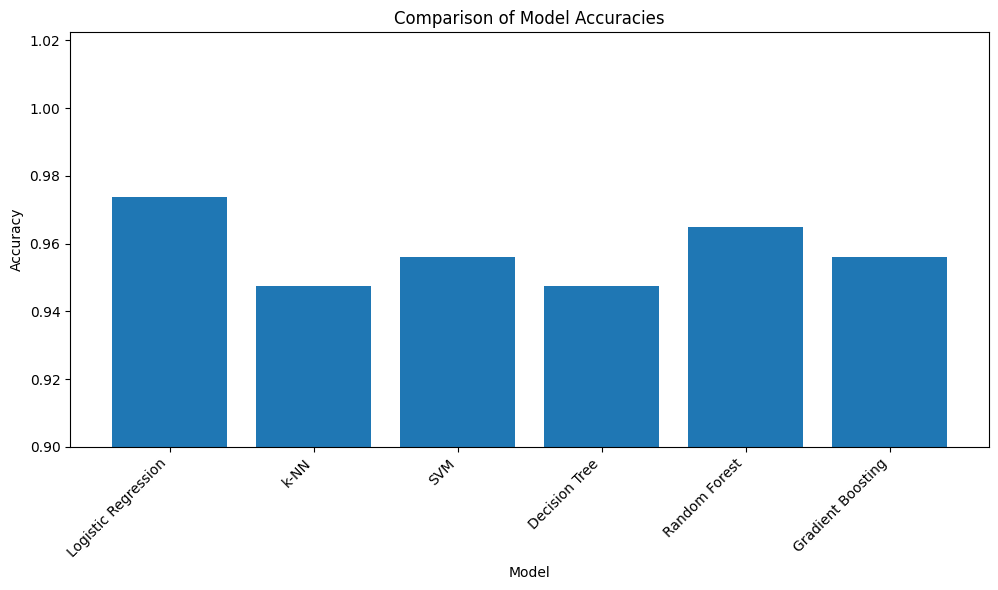

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.ylim(.9)
plt.show()

## 8. Use AutoML

In [ ]:
!pip install tpot

In [18]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


tpot = TPOTClassifier(generations=5, population_size = 50, verbosity=2, random_state=42)

tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))

# # Export the best pipeline
# tpot.export('tpot_breast_cancer_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9802197802197803

Generation 2 - Current best internal CV score: 0.9802197802197803

Generation 3 - Current best internal CV score: 0.9802197802197803

Generation 4 - Current best internal CV score: 0.9802197802197803

Generation 5 - Current best internal CV score: 0.9802197802197803

Best pipeline: DecisionTreeClassifier(MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.001), criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=15)
0.9824561403508771
